## Imports


In [ ]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 26.4 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.preprocessing import LabelEncoder
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import torch.nn.functional as F
from torchmetrics import Accuracy, Precision, Recall, F1Score

## Data Load

In [ ]:
zip_path = '/content/archive (2).zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")
print("Contents of the extracted directory:")
print(os.listdir(extract_path))

Files extracted to: /content/
Contents of the extracted directory:
['.config', 'sports.csv', 'test', 'EfficientNetB0-100-(224 X 224)- 98.40.h5', 'drive', 'valid', 'train', 'archive (2).zip', 'sample_data']


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),

])

train_dataset = ImageFolder("/content/train", transform=transform)
test_dataset  = ImageFolder("/content/test",  transform=transform)
valid_dataset = ImageFolder("/content/valid", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("Classes:", train_dataset.classes)

Classes: ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing',

## Sample Data Visualization

In [ ]:
# A function to display random samples from the datasets

def display_samples_with_labels(dataset, n):
    sample_indices = random.sample(range(len(dataset)), n)
    images_per_row = 5
    num_rows = math.ceil(n / images_per_row)

    plt.figure(figsize=(15, num_rows * 3))
    for i, idx in enumerate(sample_indices):
        image, label_index = dataset[idx]
        label = dataset.classes[label_index]

        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


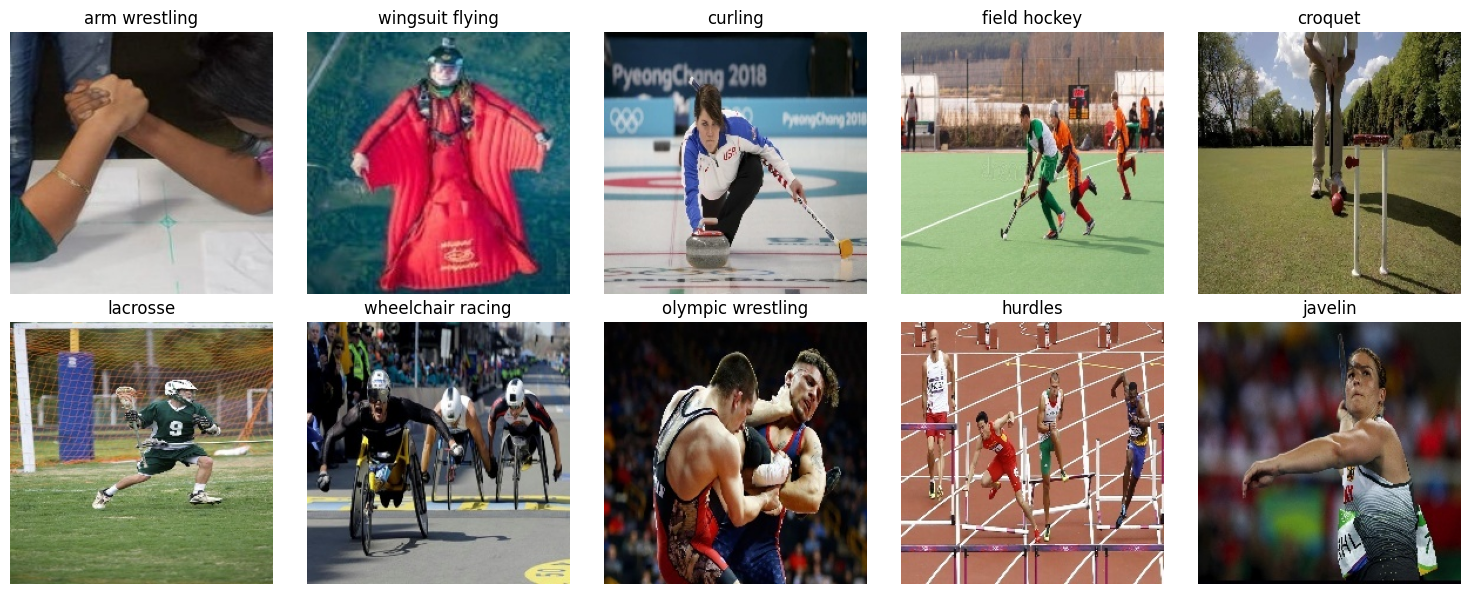

In [ ]:
display_samples_with_labels(train_dataset, 10)

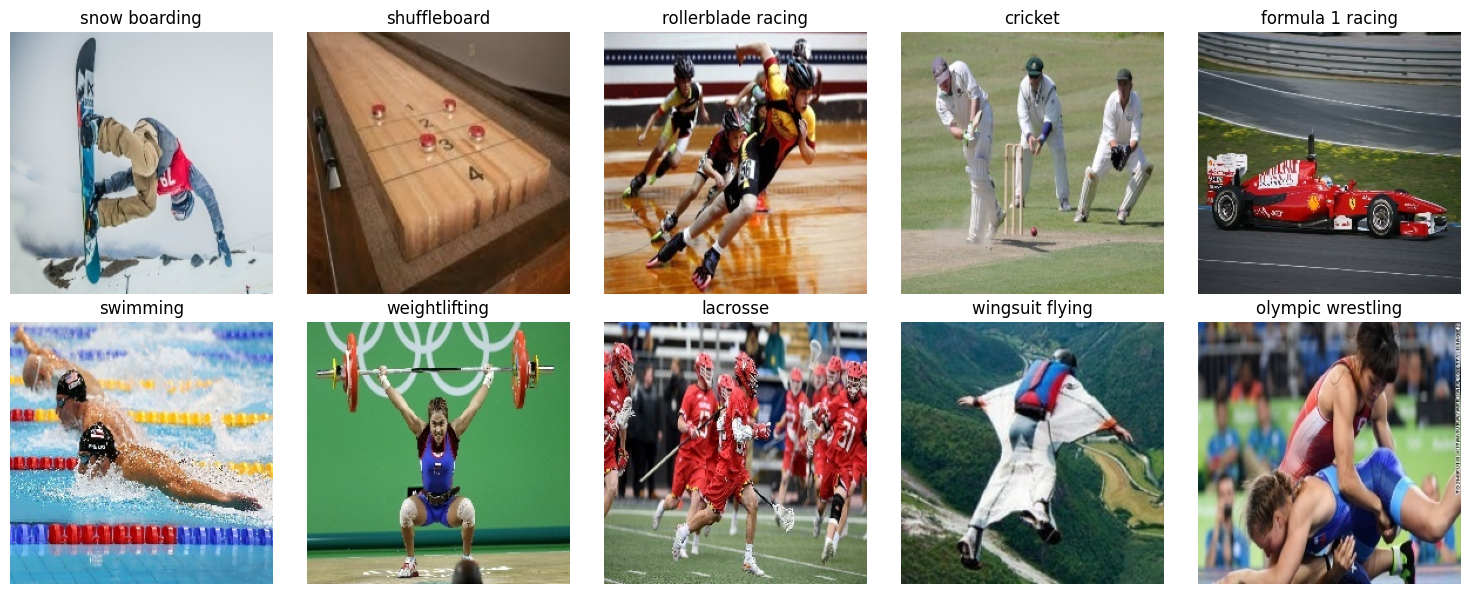

In [ ]:
display_samples_with_labels(test_dataset, 10)

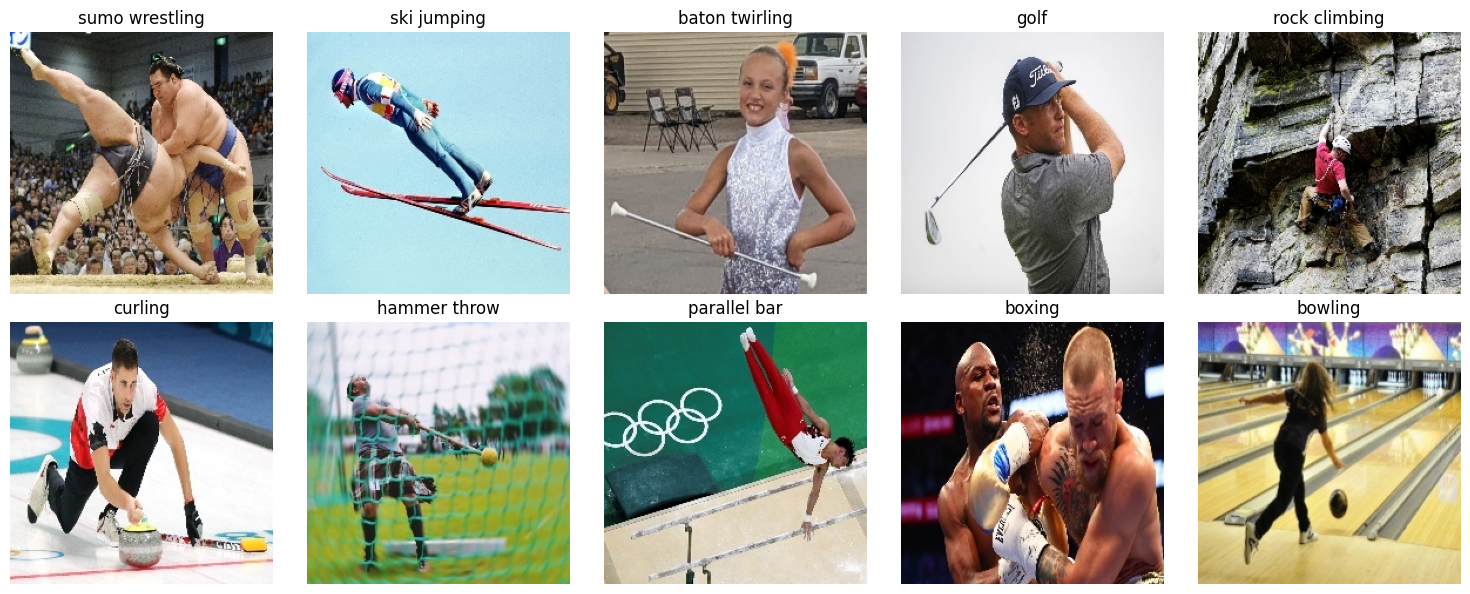

In [ ]:
display_samples_with_labels(valid_dataset, 10)

In [ ]:
print(len(train_dataset))
print(len(test_dataset))
print(len(valid_dataset))

13492
500
500


In [ ]:
img_tensor, label = train_dataset[0]
print(img_tensor.size())

torch.Size([3, 224, 224])


In [ ]:
train_dataset.class_to_idx

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

## CNN

Trial 1


*   Dropout : 0.5
*   Loss : Crossentropy
*   Optimizer: Adam
*   Learning rate : 0.001
*   Batch size : 32
*   Layers : 7
*   Loss function: relu
*  Epochs: 15















In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels= 3, out_channels=8, kernel_size=3, padding=1) # 224*224*8
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 112*112*8
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1) #112*112*16
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 56*56*16
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) # 56*56*32
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 28*28*32
        self.fc1 = nn.Linear(in_features=28 * 28 * 32, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=100)
        self.dropout = nn.Dropout(p=0.5)


    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = self.pool(F.relu(self.conv3(x)))
      x = torch.flatten(x, 1)
      x = F.relu(self.fc1(x))
      x = self.dropout(x)
      x = self.fc2(x)
      return x

In [ ]:
network = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr=0.001)

In [ ]:
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(15):
    print(f'Training epoch {epoch+1}')

    running_loss = 0.0
    train_acc_metric = Accuracy(task="multiclass", num_classes=100)
    train_acc_metric.reset()


    network.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_acc_metric.update(outputs, labels)

    train_loss = running_loss / len(train_loader)
    train_acc = train_acc_metric.compute().item()


    val_loss = 0.0
    val_acc_metric = Accuracy(task="multiclass", num_classes=100)
    val_acc_metric.reset()
    network.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = network(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            val_acc_metric.update(outputs, labels)

    val_loss /= len(valid_loader)
    val_acc = val_acc_metric.compute().item()

    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)


Training epoch 1
Epoch 1: Train Loss: 4.2555, Train Acc: 0.0434, Val Loss: 3.8203, Val Acc: 0.1020
Training epoch 2
Epoch 2: Train Loss: 3.7704, Train Acc: 0.1069, Val Loss: 3.4273, Val Acc: 0.1680
Training epoch 3
Epoch 3: Train Loss: 3.4455, Train Acc: 0.1651, Val Loss: 3.0372, Val Acc: 0.2560
Training epoch 4
Epoch 4: Train Loss: 3.1615, Train Acc: 0.2185, Val Loss: 2.9051, Val Acc: 0.3020
Training epoch 5
Epoch 5: Train Loss: 2.8794, Train Acc: 0.2693, Val Loss: 2.6185, Val Acc: 0.3600
Training epoch 6
Epoch 6: Train Loss: 2.5711, Train Acc: 0.3348, Val Loss: 2.4814, Val Acc: 0.3800
Training epoch 7
Epoch 7: Train Loss: 2.2659, Train Acc: 0.3988, Val Loss: 2.4146, Val Acc: 0.3940
Training epoch 8
Epoch 8: Train Loss: 1.9851, Train Acc: 0.4532, Val Loss: 2.4120, Val Acc: 0.4040
Training epoch 9
Epoch 9: Train Loss: 1.7106, Train Acc: 0.5185, Val Loss: 2.5836, Val Acc: 0.3740
Training epoch 10
Epoch 10: Train Loss: 1.4911, Train Acc: 0.5760, Val Loss: 2.5182, Val Acc: 0.3940
Training

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss over Epochs")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy over Epochs")
plt.show()

It is evident from the loss over epoch graph that the model overfit since the training loss continued to decrease but the validation loss decrease then kept on increasing. This is evident also from the accuracy over epochs graph where the training accuracy kept on increasing(since the model memorized the data) and the validation accuracy plateued at 40% approximately.

Trial 2


*   Dropout : 0.3
*   Loss : Crossentropy
*   Optimizer: Adam
*   Learning rate : 0.001
*   Batch size : 64
*   Layers : 7 layers
*   Applied augmentation for generization
*   Loss function:leaky-relu
*  Epochs: 20
*  Weight decay : 1e-4
*  Used a scheduler



















In [ ]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),

])

train_dataset2 = ImageFolder("/content/train", transform=transform)
test_dataset2  = ImageFolder("/content/test",  transform=transform)
valid_dataset2 = ImageFolder("/content/valid", transform=transform)

train_loader2 = DataLoader(train_dataset2, batch_size=64, shuffle=True)
test_loader2  = DataLoader(test_dataset2, batch_size=64, shuffle=False)
valid_loader2 = DataLoader(valid_dataset2, batch_size=64, shuffle=False)

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 16 * 32, 128)
        self.fc2 = nn.Linear(128, 100)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = self.pool(F.leaky_relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
network2 = CNN2()
loss_fn = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(network2.parameters(), lr=0.001, weight_decay= 1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, patience=2, factor=0.5)

In [ ]:
train_losses2, val_losses2 = [], []
train_accs2, val_accs2 = [], []

for epoch in range(40):
    print(f'Training epoch {epoch+1}')

    running_loss = 0.0
    train_acc_metric = Accuracy(task="multiclass", num_classes=100)
    train_acc_metric.reset()


    network2.train()
    for inputs, labels in train_loader2:
        optimizer.zero_grad()
        outputs = network2(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_acc_metric.update(outputs, labels)

    train_loss = running_loss / len(train_loader2)
    train_acc = train_acc_metric.compute().item()


    val_loss = 0.0
    val_acc_metric = Accuracy(task="multiclass", num_classes=100)
    val_acc_metric.reset()
    network2.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader2:
            outputs = network2(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            val_acc_metric.update(outputs, labels)


    val_loss /= len(valid_loader2)
    val_acc = val_acc_metric.compute().item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    train_losses2.append(train_loss)
    val_losses2.append(val_loss)
    train_accs2.append(train_acc)
    val_accs2.append(val_acc)


Training epoch 1
Epoch 1: Train Loss: 4.1649, Train Acc: 0.0579, Val Loss: 3.5910, Val Acc: 0.1280
Training epoch 2
Epoch 2: Train Loss: 3.4221, Train Acc: 0.1644, Val Loss: 2.9422, Val Acc: 0.2720
Training epoch 3
Epoch 3: Train Loss: 3.0000, Train Acc: 0.2493, Val Loss: 2.6724, Val Acc: 0.3400
Training epoch 4
Epoch 4: Train Loss: 2.7554, Train Acc: 0.2980, Val Loss: 2.4759, Val Acc: 0.3860
Training epoch 5
Epoch 5: Train Loss: 2.5699, Train Acc: 0.3361, Val Loss: 2.3530, Val Acc: 0.4120
Training epoch 6
Epoch 6: Train Loss: 2.3989, Train Acc: 0.3751, Val Loss: 2.2358, Val Acc: 0.3960
Training epoch 7
Epoch 7: Train Loss: 2.2538, Train Acc: 0.4053, Val Loss: 2.0521, Val Acc: 0.4540
Training epoch 8
Epoch 8: Train Loss: 2.1281, Train Acc: 0.4313, Val Loss: 1.9785, Val Acc: 0.4700
Training epoch 9
Epoch 9: Train Loss: 2.0180, Train Acc: 0.4555, Val Loss: 1.9948, Val Acc: 0.4720
Training epoch 10
Epoch 10: Train Loss: 1.9366, Train Acc: 0.4752, Val Loss: 1.9428, Val Acc: 0.4880
Training

KeyboardInterrupt: 

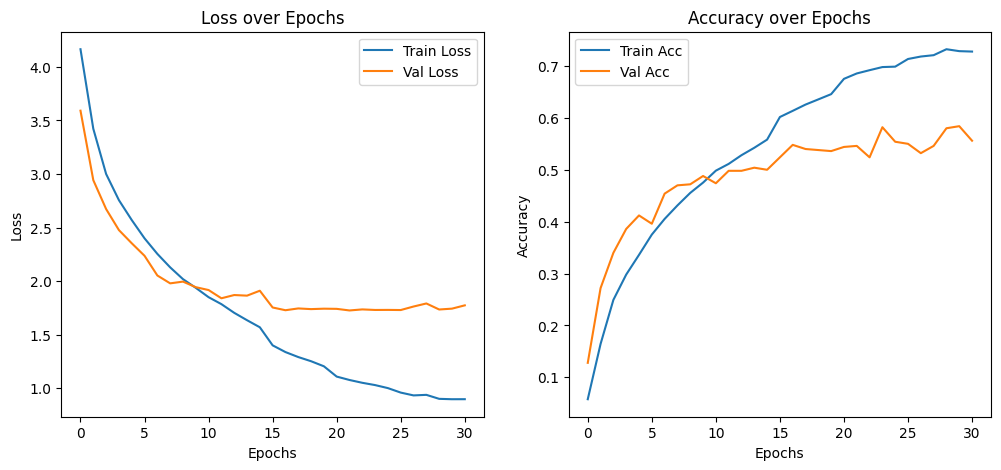

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses2, label="Train Loss")
plt.plot(val_losses2, label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss over Epochs")

plt.subplot(1,2,2)
plt.plot(train_accs2, label="Train Acc")
plt.plot(val_accs2, label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy over Epochs")
plt.show()

Early stop was applied here to avoid overfitting the model. The training accuracy started getting at a plateau and and loss started to decrease at a very low rate. The training loss stopped decreasing at ~1.7 approximately and the highest validation accuracy was at epoch 24 then started to flactuate. So early stop was applied at epoch 30 (patience 5)

Trial 3

*   Dropout : 0.2
*   Reduced image size to 128*128
*   Loss : Crossentropy
*   Optimizer: Adam
*   Learning rate : 0.001
*   Weight decay: 1e-4
*   Batch size : 128
*   Layers : 7
*   Loss function: relu
*   Epochs: 30
*   Used batch normalization




In [ ]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),

])

train_dataset3 = ImageFolder("/content/train", transform=transform)
test_dataset3  = ImageFolder("/content/test",  transform=transform)
valid_dataset3 = ImageFolder("/content/valid", transform=transform)

train_loader3 = DataLoader(train_dataset3, batch_size=128, shuffle=True)
test_loader3 = DataLoader(test_dataset3, batch_size=128, shuffle=False)
valid_loader3 = DataLoader(valid_dataset3, batch_size=128, shuffle=False)

In [ ]:
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()

        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 16 * 32, 128)
        self.fc2 = nn.Linear(128, 100)
        self.dropout = nn.Dropout(0.2)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
network3 = CNN3()
loss_fn = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(network3.parameters(), lr=0.001, weight_decay= 1e-4)
scheduler3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer3, patience=2, factor=0.5)

In [ ]:
train_losses3, val_losses3 = [], []
train_accs3, val_accs3 = [], []

for epoch in range(30):
    print(f'Training epoch {epoch+1}')

    running_loss = 0.0
    train_acc_metric = Accuracy(task="multiclass", num_classes=100)
    train_acc_metric.reset()

    network3.train()
    for inputs, labels in train_loader3:
        optimizer.zero_grad()
        outputs = network3(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_acc_metric.update(outputs, labels)

    train_loss = running_loss / len(train_loader3)
    train_acc = train_acc_metric.compute().item()


    val_loss = 0.0
    val_acc_metric = Accuracy(task="multiclass", num_classes=100)
    val_acc_metric.reset()
    network3.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader3:
            outputs = network3(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            val_acc_metric.update(outputs, labels)


    val_loss /= len(valid_loader3)
    val_acc = val_acc_metric.compute().item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    train_losses3.append(train_loss)
    val_losses3.append(val_loss)
    train_accs3.append(train_acc)
    val_accs3.append(val_acc)


Training epoch 1
Epoch 1: Train Loss: 4.5184, Train Acc: 0.0216, Val Loss: 4.2888, Val Acc: 0.0420
Training epoch 2
Epoch 2: Train Loss: 4.2551, Train Acc: 0.0378, Val Loss: 4.1115, Val Acc: 0.0440
Training epoch 3
Epoch 3: Train Loss: 4.0702, Train Acc: 0.0534, Val Loss: 3.8191, Val Acc: 0.0920
Training epoch 4
Epoch 4: Train Loss: 3.9095, Train Acc: 0.0682, Val Loss: 3.7230, Val Acc: 0.0840
Training epoch 5
Epoch 5: Train Loss: 3.8534, Train Acc: 0.0728, Val Loss: 3.6127, Val Acc: 0.1080
Training epoch 6
Epoch 6: Train Loss: 3.8001, Train Acc: 0.0815, Val Loss: 3.5769, Val Acc: 0.1180
Training epoch 7
Epoch 7: Train Loss: 3.7763, Train Acc: 0.0814, Val Loss: 3.5085, Val Acc: 0.1040
Training epoch 8
Epoch 8: Train Loss: 3.7425, Train Acc: 0.0878, Val Loss: 3.4893, Val Acc: 0.1100
Training epoch 9
Epoch 9: Train Loss: 3.7436, Train Acc: 0.0859, Val Loss: 3.4730, Val Acc: 0.1020
Training epoch 10
Epoch 10: Train Loss: 3.7097, Train Acc: 0.0906, Val Loss: 3.4080, Val Acc: 0.1280
Training

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses3, label="Train Loss")
plt.plot(val_losses3, label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss over Epochs")

plt.subplot(1,2,2)
plt.plot(train_accs3, label="Train Acc")
plt.plot(val_accs3, label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy over Epochs")
plt.show()

I stopped the training at 20 epoch from 30 epochs since the training was too slow that the maximum training accuracy reached after 20 epochs was 10%. It was evident that the model was underfit.

In [ ]:
results = {name: {} for name in names}

for net, name, loader in zip(networks, names, test_loaders):
    net.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)


    all_preds_np = all_preds.cpu().numpy()
    all_labels_np = all_labels.cpu().numpy()

    results[name]['accuracy'] = accuracy_score(all_labels_np, all_preds_np)
    results[name]['precision_macro'] = precision_score(all_labels_np, all_preds_np, average='macro', zero_division=0)
    results[name]['recall_macro'] = recall_score(all_labels_np, all_preds_np, average='macro', zero_division=0)
    results[name]['f1_macro'] = f1_score(all_labels_np, all_preds_np, average='macro', zero_division=0)

    results[name]['precision_micro'] = precision_score(all_labels_np, all_preds_np, average='micro', zero_division=0)
    results[name]['recall_micro'] = recall_score(all_labels_np, all_preds_np, average='micro', zero_division=0)
    results[name]['f1_micro'] = f1_score(all_labels_np, all_preds_np, average='micro', zero_division=0)


metrics_table = pd.DataFrame({
    name: {
        'Accuracy': results[name]['accuracy'],
        'Precision (Macro)': results[name]['precision_macro'],
        'Recall (Macro)': results[name]['recall_macro'],
        'F1 (Macro)': results[name]['f1_macro'],
        'Precision (Micro)': results[name]['precision_micro'],
        'Recall (Micro)': results[name]['recall_micro'],
        'F1 (Micro)': results[name]['f1_micro']
    } for name in names
})

print(metrics_table)


                    Trial 1   Trial 2   Trial 3
Accuracy           0.400000  0.590000  0.156000
Precision (Macro)  0.436411  0.613944  0.098940
Recall (Macro)     0.400000  0.590000  0.156000
F1 (Macro)         0.381591  0.581058  0.103532
Precision (Micro)  0.400000  0.590000  0.156000
Recall (Micro)     0.400000  0.590000  0.156000
F1 (Micro)         0.400000  0.590000  0.156000



*  The second combination of parameters produced the best output with the highest accuracy 59%.
*  It is evident that the batch added to the network enhanced the performance, this trial also had a higher batch size than the first one and a scheduler added as well. Leaky relu function was also used instead of relu.
*   Trial 2 has the best values in all of the matrices (it performs better across all classes and not just the majority ones).
*   The 2nd model is also having a balanced performance since the micro and macro averages are so close to eachother.
*   The first model had a lower accuracy than the 2nd model; this model was overfit during the training.
*   The 3rd model had a really bad performance ,its accuracy did not exceed 20% even and it took a long time to run the epochs as well. It was evident that the model was underfit.
   











In [ ]:
checkpoint3 = {
    'epoch': 30,
    'model_state_dict': network3.state_dict(),
    'optimizer_state_dict': optimizer3.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'train_losses': train_losses3,
    'val_losses': val_losses3,
    'train_accuracies': train_accs3,
    'val_accuracies': val_accs3
}

torch.save(checkpoint3, "checkpoint3.pth")


In [ ]:
checkpoint2 = {
    'epoch': 30,
    'model_state_dict': network2.state_dict(),
    'optimizer_state_dict': optimizer2.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'train_losses': train_losses2,
    'val_losses': val_losses2,
    'train_accuracies': train_accs2,
    'val_accuracies': val_accs2
}

torch.save(checkpoint2, "checkpoint2.pth")

In [ ]:
checkpoint1 = {
    'epoch': 15,
    'model_state_dict': network.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accs,
    'val_accuracies': val_accs
}

torch.save(checkpoint1, "checkpoint1.pth")

In [ ]:
from google.colab import files
files.download("checkpoint1.pth")
files.download("checkpoint2.pth")
files.download("checkpoint3.pth")